In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
import pandas as pd

In [2]:
df = pd.read_csv('QSTP_LogReg.csv')

In [3]:
x_data = df.iloc[:,1:-1].values

In [4]:
x_data.shape

(683, 9)

In [5]:
y_data = [1 if value==4 else 0 for value in df.iloc[:,-1].values]

In [6]:
scaler.fit(x_data)

StandardScaler()

In [7]:
scaler.mean_

array([4.44216691, 3.15080527, 3.21522694, 2.83016105, 3.23426061,
       3.54465593, 3.44509517, 2.86969253, 1.60322108])

In [8]:
scaler.var_

array([ 7.94504479,  9.38135733,  8.91853827,  8.19370232,  4.93487306,
       13.25825475,  5.99222704,  9.30512831,  2.99776415])

In [9]:
scaler.transform(x_data)[0:5]

array([[ 0.19790469, -0.70221201, -0.74177362, -0.63936553, -0.5556085 ,
        -0.69885309, -0.18182716, -0.61292736, -0.34839971],
       [ 0.19790469,  0.27725185,  0.26278299,  0.75803177,  1.69516613,
         1.77286724, -0.18182716, -0.28510482, -0.34839971],
       [-0.51164337, -0.70221201, -0.74177362, -0.63936553, -0.5556085 ,
        -0.4242175 , -0.18182716, -0.61292736, -0.34839971],
       [ 0.55267873,  1.58320366,  1.6021918 , -0.63936553, -0.10545357,
         0.12505369, -0.18182716,  1.3540079 , -0.34839971],
       [-0.15686934, -0.70221201, -0.74177362,  0.05933312, -0.5556085 ,
        -0.69885309, -0.18182716, -0.61292736, -0.34839971]])

In [10]:
train_x = scaler.transform(x_data)[0:int(x_data.shape[0]*0.8)]
train_x = np.c_[np.ones((np.array(train_x).shape[0])),np.array(train_x)]
test_x = scaler.transform(x_data)[int(x_data.shape[0]*0.8):]
test_x = np.c_[np.ones((np.array(test_x).shape[0])),np.array(test_x)]
train_x.shape

(546, 10)

In [11]:
train_y = np.array(y_data[0:int(len(y_data)*0.8)]).reshape(-1,1)
test_y = np.array(y_data[int(len(y_data)*0.8) : ]).reshape(-1,1)
train_y.shape

(546, 1)

In [12]:

    return errorlist,finalepoch

SyntaxError: 'return' outside function (<ipython-input-12-7e5f612bb221>, line 1)

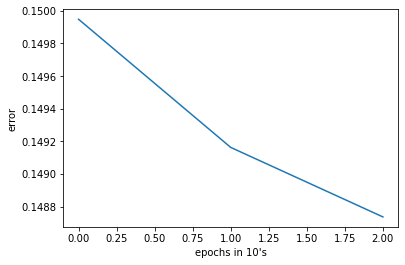

[3.]


array([0.97])

In [48]:
from sklearn.linear_model import LogisticRegression

print(train_x[0])
clf = LogisticRegression()
clf.fit(train_x,train_y.reshape(546,))#note here we are training the model on X1,y and evaluating the train accuracy. 

predict_y=clf.predict(test_x)
predict_y.shape

[ 1.          0.19790469 -0.70221201 -0.74177362 -0.63936553 -0.5556085
 -0.69885309 -0.18182716 -0.61292736 -0.34839971]


(137,)

In [43]:
error=sum((predict_y-test_y.reshape(137,))**2)
accuracy=1-(error/test_y.shape[0])
accuracy

1.0

In [44]:
import pickle

In [46]:
pickle.dump(clf,open('model.pkl','wb'))

In [56]:
normalization = {}
normalization['mean'] = scaler.mean_
normalization['std dev'] = np.sqrt(scaler.var_)

In [57]:
normalization

{'mean': array([4.44216691, 3.15080527, 3.21522694, 2.83016105, 3.23426061,
        3.54465593, 3.44509517, 2.86969253, 1.60322108]),
 'std dev': array([2.81869558, 3.06290015, 2.98639218, 2.86246438, 2.22145742,
        3.64118865, 2.44790258, 3.05043084, 1.73140525])}

In [58]:
pickle.dump(normalization, open('normalize.pkl','ab'))